<h1><center>TALLER ANÁLISIS EXPLORATORIO Y PROCESAMIENTO</center></h1>

## Autores : Daniel Enrique Barros Agamez & Kevin Acosta Lopez


## 1. Cargando Datos

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb

COLUMNS = ['Status','Duration','Credit History','Purpose','Credit Amount','Saving Account', 'Present Employment Since',
           'Rate','Status and Sex','Debtors/Guarantors','Residence Since','Property','Age','Plans','Housing','Number',
           'Job','Number of people','Telephone','Foreing Worker','Apt']
data = pd.read_csv("german.data", delimiter = ' ', names = COLUMNS)
data.head()

,Status,Duration,Credit History,Purpose,Credit Amount,Saving Account,Present Employment Since,Rate,Status and Sex,Debtors/Guarantors,...,Property,Age,Plans,Housing,Number,Job,Number of people,Telephone,Foreing Worker,Apt
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2


### Cambio de etiqueta de las variables

In [2]:
import json
def leer_JSON():
    with open('data base.json', 'r') as archivo:
        return json.load(archivo)

In [3]:
myDict = leer_JSON()

In [4]:
columns_Cat = data.select_dtypes(exclude='int64').columns
columns_Cat

Index(['Status', 'Credit History', 'Purpose', 'Saving Account',
       'Present Employment Since', 'Status and Sex', 'Debtors/Guarantors',
       'Property', 'Plans', 'Housing', 'Job', 'Telephone', 'Foreing Worker'],
      dtype='object')

In [5]:
#Se debe ejecutar una sola vez
for nameCol in columns_Cat:
    for key in data[nameCol].unique():
        value = myDict[nameCol][key]
        data[nameCol] = data[nameCol].replace(key, value)      

In [6]:
data.head(10)

,Status,Duration,Credit History,Purpose,Credit Amount,Saving Account,Present Employment Since,Rate,Status and Sex,Debtors/Guarantors,...,Property,Age,Plans,Housing,Number,Job,Number of people,Telephone,Foreing Worker,Apt
0,A,6,Critico,radio/tv,1169,sin cuenta,Mayor que 6,4,mujer sol,ninguno,...,bienes raices,67,ninguno,propio,2,empleado,1,si,si,1
1,B,48,Algunos reembolsados,radio/tv,5951,Menor de 100,entre 1 y 4,2,mujer DSC,ninguno,...,bienes raices,22,ninguno,propio,1,empleado,1,no,si,2
2,D,12,Critico,education,2096,Menor de 100,entre 4 y 7,2,mujer sol,ninguno,...,bienes raices,49,ninguno,propio,1,no calificado,2,no,si,1
3,A,42,Algunos reembolsados,furniture/equipment,7882,Menor de 100,entre 4 y 7,2,mujer sol,fiador,...,seguro de vida,45,ninguno,gratis,1,empleado,2,no,si,1
4,A,24,Retrasado,Carro nuevo,4870,Menor de 100,entre 1 y 4,3,mujer sol,ninguno,...,Sin propiedad,53,ninguno,gratis,2,empleado,2,no,si,2
5,D,36,Algunos reembolsados,education,9055,sin cuenta,entre 1 y 4,2,mujer sol,ninguno,...,Sin propiedad,35,ninguno,gratis,1,no calificado,2,si,si,1
6,D,24,Algunos reembolsados,furniture/equipment,2835,entre 500 y 1000,Mayor que 6,3,mujer sol,ninguno,...,seguro de vida,53,ninguno,propio,1,empleado,1,no,si,1
7,B,36,Algunos reembolsados,Carro usado,6948,Menor de 100,entre 1 y 4,2,mujer sol,ninguno,...,carro u otro,35,ninguno,alquilada,1,independiente,1,si,si,1
8,D,12,Algunos reembolsados,radio/tv,3059,mayor que 999,entre 4 y 7,2,hombre DS,ninguno,...,bienes raices,61,ninguno,propio,1,no calificado,1,no,si,1
9,B,30,Critico,Carro nuevo,5234,Menor de 100,desempleado,4,hombre CV,ninguno,...,carro u otro,28,ninguno,propio,2,independiente,1,no,si,2


## 2. Procesamiento de los datos

### *2.1 y 2.2 Número de instancias y atributos:*

In [7]:
shape = data.shape
print(f"Número de instancias: {shape[0]}")
print(f"Número de atributos: {shape[1]}")

Número de instancias: 1000
Número de atributos: 21


### *2.3 El conjunto de datos está etiquetado con la variable de clase "Apt"*

In [8]:
data.dtypes

Status                      object
Duration                     int64
Credit History              object
Purpose                     object
Credit Amount                int64
Saving Account              object
Present Employment Since    object
Rate                         int64
Status and Sex              object
Debtors/Guarantors          object
Residence Since              int64
Property                    object
Age                          int64
Plans                       object
Housing                     object
Number                       int64
Job                         object
Number of people             int64
Telephone                   object
Foreing Worker              object
Apt                         object
dtype: object

### *2.4 Cantidad de atributos númerico y categoricos*

In [9]:
categorico = data.select_dtypes(exclude='int64').columns
numerico = data.select_dtypes(exclude='object').columns
print("Variables categoricas: ", len(categorico))
print("Variables númericas: ", len(numerico))

Variables categoricas:  14
Variables númericas:  7


### *2.5 Moda de atributos categoricos*

In [10]:
data.select_dtypes(exclude='int64').mode()

,Status,Credit History,Purpose,Saving Account,Present Employment Since,Status and Sex,Debtors/Guarantors,Property,Plans,Housing,Job,Telephone,Foreing Worker,Apt
0,D,Algunos reembolsados,radio/tv,Menor de 100,entre 1 y 4,mujer sol,ninguno,carro u otro,ninguno,propio,empleado,no,si,Bueno


### *2.6 Media, rango y desviación estandar de cada atributo numérico*

In [11]:
data.describe()

,Duration,Credit Amount,Rate,Residence Since,Age,Number,Number of people
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000


In [12]:
#rango
data.select_dtypes(include='int64').apply(lambda x: max(x)-min(x))

Duration               68
Credit Amount       18174
Rate                    3
Residence Since         3
Age                    56
Number                  3
Number of people        1
dtype: int64

### *2.7 Distribción de las clases*

Text(0.5, 1.0, 'Recuento de Personas Clasificadas')

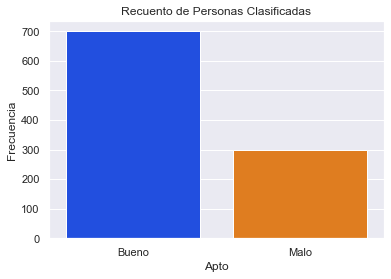

In [13]:
sb.set()
sb.countplot(x="Apt", data=data, palette='bright')
plt.xlabel("Apto")
plt.ylabel("Frecuencia")
plt.title("Recuento de Personas Clasificadas")

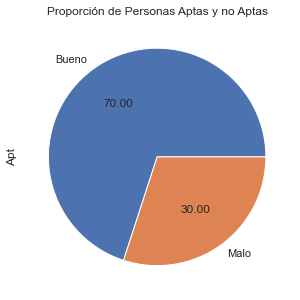

In [14]:
plot = data['Apt'].value_counts().plot(kind='pie', autopct='%.2f', figsize=(5, 5),
                                       title='Proporción de Personas Aptas y no Aptas')
plt.show()

Media Duration :  35.546
Media Age :  20.903


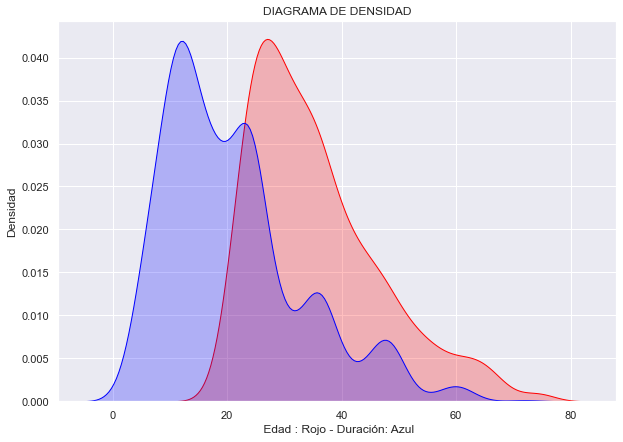

In [15]:
plt.figure(figsize=(10, 7))
media1, media2= data['Age'].mean(), data['Duration'].mean()
sb.kdeplot(data['Age'], shade = True, color = 'red')
sb.kdeplot(data['Duration'], shade = True, color = 'blue')
plt.ylabel("Densidad")
plt.xlabel(" Edad : Rojo - Duración: Azul")
plt.title("DIAGRAMA DE DENSIDAD")
print(f"Media Duration :  {media1}")
print(f"Media Age :  {media2}")


Media: 3271.258


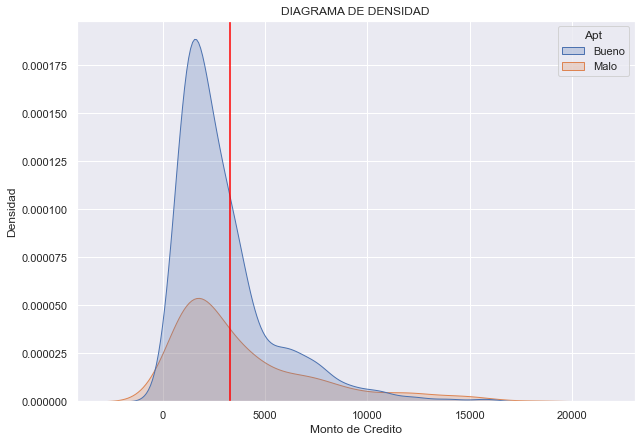

In [16]:
plt.figure(figsize=(10, 7))
media = data['Credit Amount'].mean()
sb.kdeplot(data['Credit Amount'], shade = True, color = 'green', hue = data['Apt'])
plt.axvline(media, 0,1, color = 'red')
plt.ylabel("Densidad")
plt.xlabel("Monto de Credito")
plt.title("DIAGRAMA DE DENSIDAD")
print(f"Media: {media}")

### *2.8 Detección de datos atipicos*

In [17]:
data.isna().sum()

Status                      0
Duration                    0
Credit History              0
Purpose                     0
Credit Amount               0
Saving Account              0
Present Employment Since    0
Rate                        0
Status and Sex              0
Debtors/Guarantors          0
Residence Since             0
Property                    0
Age                         0
Plans                       0
Housing                     0
Number                      0
Job                         0
Number of people            0
Telephone                   0
Foreing Worker              0
Apt                         0
dtype: int64

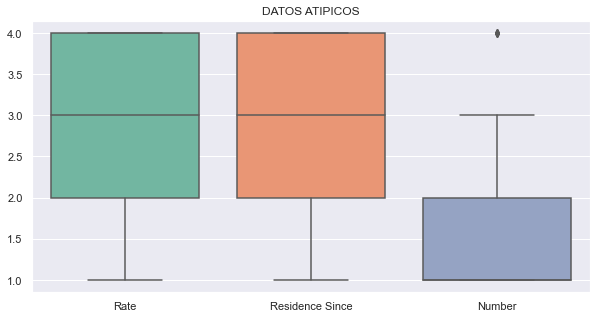

In [18]:
plt.figure(figsize=(10, 5))
plt.title("DATOS ATIPICOS")
ax = sb.boxplot(data=data[['Rate', 'Residence Since', 'Number']],
                orient="v", palette="Set2")

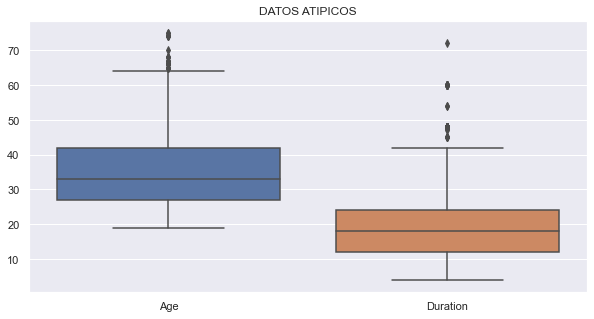

In [19]:
plt.figure(figsize=(10, 5))
plt.title("DATOS ATIPICOS")
ax = sb.boxplot(data=data[['Age', 'Duration']],
                orient="v")

### *2.10 Datos numéricos a Categoricos*

In [20]:
col_Num = data.select_dtypes(include='int64').columns
print(data[col_Num].min())
print(data[col_Num].max())

Duration              4
Credit Amount       250
Rate                  1
Residence Since       1
Age                  19
Number                1
Number of people      1
dtype: int64
Duration               72
Credit Amount       18424
Rate                    4
Residence Since         4
Age                    75
Number                  4
Number of people        2
dtype: int64


In [21]:
#Tecnica de Discretización 'Duration', 'Credit Amount', 'Rate', 'Residence Since', 'Age', 'Number', Number of people'
data2 = data.copy()
bins = np.array([0, 12, 17, 30, 60, 70]) 
labels = np.array(['niño', 'adolescente', 'joven', 'adulto', 'adulto mayor'])
data2['Age'] = pd.cut(data['Age'], bins, labels = labels)
data2.head(3)

,Status,Duration,Credit History,Purpose,Credit Amount,Saving Account,Present Employment Since,Rate,Status and Sex,Debtors/Guarantors,...,Property,Age,Plans,Housing,Number,Job,Number of people,Telephone,Foreing Worker,Apt
0,A,6,Critico,radio/tv,1169,sin cuenta,Mayor que 6,4,mujer sol,ninguno,...,bienes raices,adulto mayor,ninguno,propio,2,empleado,1,si,si,Bueno
1,B,48,Algunos reembolsados,radio/tv,5951,Menor de 100,entre 1 y 4,2,mujer DSC,ninguno,...,bienes raices,joven,ninguno,propio,1,empleado,1,no,si,Malo
2,D,12,Critico,education,2096,Menor de 100,entre 4 y 7,2,mujer sol,ninguno,...,bienes raices,adulto,ninguno,propio,1,no calificado,2,no,si,Bueno


In [22]:
data['Duration'].max()

72

### *2.11 Datos Categoricos a Numéricos*

In [23]:
for col in columns_Cat:
    print(f"{col}: ",data[col].unique())

Status:  ['A' 'B' 'D' 'C']
Credit History:  ['Critico' 'Algunos reembolsados' 'Retrasado' 'No tiene'
 'Todos reembolsados']
Purpose:  ['radio/tv' 'education' 'furniture/equipment' 'Carro nuevo' 'Carro usado'
 'Negocios' 'uso domestico' 'repairs' 'otros' 'retraining']
Saving Account:  ['sin cuenta' 'Menor de 100' 'entre 500 y 1000' 'mayor que 999'
 'entre 100 y 500']
Present Employment Since:  ['Mayor que 6' 'entre 1 y 4' 'entre 4 y 7' 'desempleado' 'menor que 1']
Status and Sex:  ['mujer sol' 'mujer DSC' 'hombre DS' 'hombre CV']
Debtors/Guarantors:  ['ninguno' 'fiador' 'co-applicant']
Property:  ['bienes raices' 'seguro de vida' 'Sin propiedad' 'carro u otro']
Plans:  ['ninguno' 'Banco' 'tiendas']
Housing:  ['propio' 'gratis' 'alquilada']
Job:  ['empleado' 'no calificado' 'independiente' 'desempleado']
Telephone:  ['si' 'no']
Foreing Worker:  ['si' 'no']
Apt:  ['Bueno' 'Malo']


In [24]:
#Se ejecuta una sola vez
data3 = data.copy()
data3 = pd.get_dummies(data3, columns = columns_Cat)

In [25]:
data3.head(10)

,Duration,Credit Amount,Rate,Residence Since,Age,Number,Number of people,Status_A,Status_B,Status_C,...,Job_desempleado,Job_empleado,Job_independiente,Job_no calificado,Telephone_no,Telephone_si,Foreing Worker_no,Foreing Worker_si,Apt_Bueno,Apt_Malo
0,6,1169,4,4,67,2,1,1,0,0,...,0,1,0,0,0,1,0,1,1,0
1,48,5951,2,2,22,1,1,0,1,0,...,0,1,0,0,1,0,0,1,0,1
2,12,2096,2,3,49,1,2,0,0,0,...,0,0,0,1,1,0,0,1,1,0
3,42,7882,2,4,45,1,2,1,0,0,...,0,1,0,0,1,0,0,1,1,0
4,24,4870,3,4,53,2,2,1,0,0,...,0,1,0,0,1,0,0,1,0,1
5,36,9055,2,4,35,1,2,0,0,0,...,0,0,0,1,0,1,0,1,1,0
6,24,2835,3,4,53,1,1,0,0,0,...,0,1,0,0,1,0,0,1,1,0
7,36,6948,2,2,35,1,1,0,1,0,...,0,0,1,0,0,1,0,1,1,0
8,12,3059,2,4,61,1,1,0,0,0,...,0,0,0,1,1,0,0,1,1,0
9,30,5234,4,2,28,2,1,0,1,0,...,0,0,1,0,1,0,0,1,0,1


In [26]:
#Verificando tipos de datos
data3.dtypes

Duration             int64
Credit Amount        int64
Rate                 int64
Residence Since      int64
Age                  int64
                     ...  
Telephone_si         uint8
Foreing Worker_no    uint8
Foreing Worker_si    uint8
Apt_Bueno            uint8
Apt_Malo             uint8
Length: 63, dtype: object

## 2.12 *Discretización de Varibales Numéricas*

In [27]:
from sklearn import preprocessing as pr
rango = 5
data4 = data.copy()
names = np.array(['Age', 'Duration', 'Credit Amount'])
for nameCol in names:
    dataF = pr.KBinsDiscretizer(n_bins=rango, encode='ordinal', strategy='uniform').fit_transform(data4[[nameCol]])
    data4[nameCol] = pd.DataFrame(dataF)

In [28]:
 for nameCol in names:
        print(data4[nameCol].unique())

[4. 0. 2. 3. 1.]
[0. 3. 2. 1. 4.]
[0. 1. 2. 3. 4.]


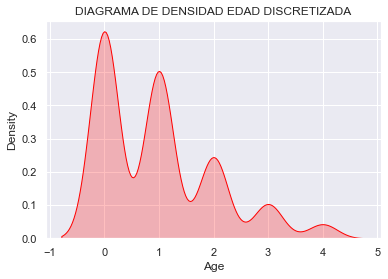

In [29]:
plt.title("DIAGRAMA DE DENSIDAD EDAD DISCRETIZADA")
sb.kdeplot(data4['Age'], color = 'red', shade = True)
plt.show()

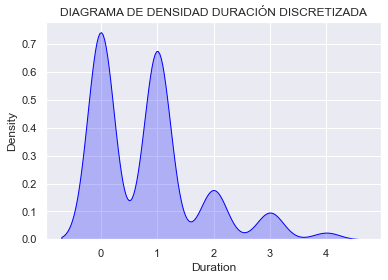

In [30]:
plt.title("DIAGRAMA DE DENSIDAD DURACIÓN DISCRETIZADA")
sb.kdeplot(data4['Duration'], color = 'blue', shade = True)
plt.show()

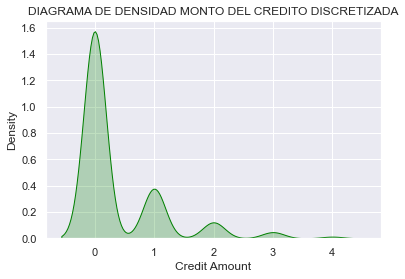

In [31]:
plt.title("DIAGRAMA DE DENSIDAD MONTO DEL CREDITO DISCRETIZADA")
sb.kdeplot(data4['Credit Amount'], color = 'green', shade = True)
plt.show()

## 3. Respondiendo preguntas

### 3.1 *Propósito predominante del prestamo*

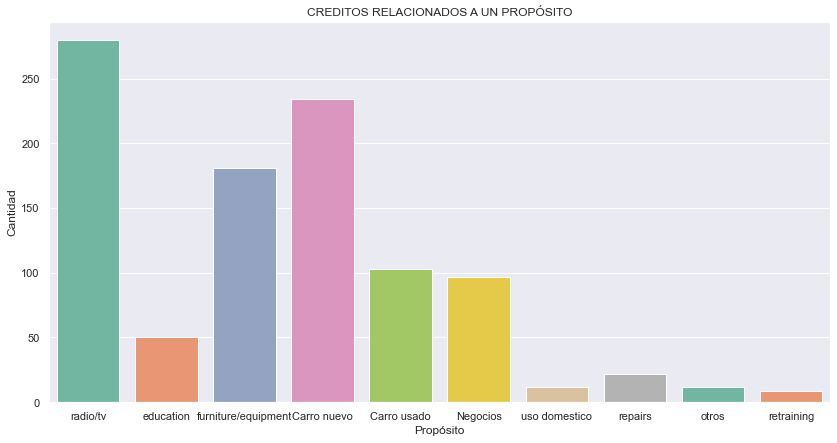

In [32]:
#Relación entre prestamo y propósito
plt.figure(figsize=(14,7))
sb.countplot(x = data['Purpose'], data = data, palette="Set2")
plt.xlabel("Propósito")
plt.ylabel("Cantidad")
plt.title("CREDITOS RELACIONADOS A UN PROPÓSITO")
plt.show()

In [33]:
data.groupby('Purpose')['Purpose'].count().sort_values(ascending = False)

Purpose
radio/tv               280
Carro nuevo            234
furniture/equipment    181
Carro usado            103
Negocios                97
education               50
repairs                 22
uso domestico           12
otros                   12
retraining               9
Name: Purpose, dtype: int64

### 3.2 *Estatus de las personas que mas solicitan prestamos*

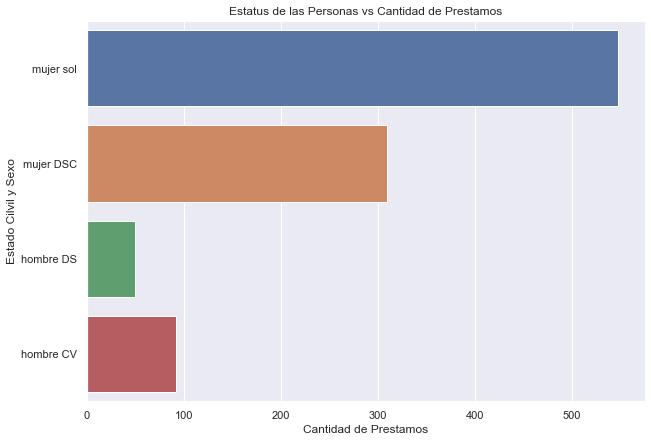

Status and Sex
mujer sol    548
mujer DSC    310
hombre CV     92
hombre DS     50
Name: Status and Sex, dtype: int64


In [34]:
#Estatus de las personas que solicitan un prestamo
plt.figure(figsize=(10,7))
sb.countplot(y = data['Status and Sex'], data = data)
plt.ylabel("Estado Cilvil y Sexo")
plt.xlabel("Cantidad de Prestamos")
plt.title("Estatus de las Personas vs Cantidad de Prestamos")
plt.show()
print(data.groupby('Status and Sex')['Status and Sex'].count().sort_values(ascending = False))

### 3.2.1 *Perfil de los que realizan menos prestamos*

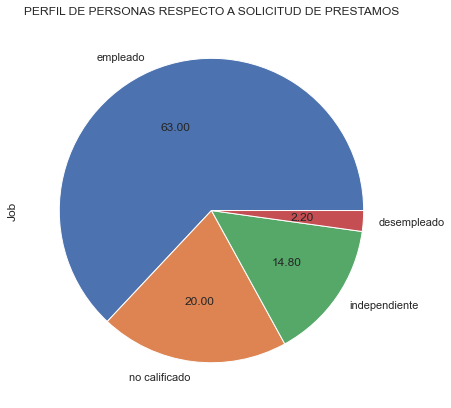

Job
desempleado       22
independiente    148
no calificado    200
empleado         630
Name: Job, dtype: int64


In [35]:
personas = data.groupby('Job')['Job'].count().sort_values()
plot = data['Job'].value_counts().plot(kind='pie', autopct='%.2f', figsize=(10, 7),
                                       title='PERFIL DE PERSONAS RESPECTO A SOLICITUD DE PRESTAMOS')
plt.show()
print(personas)

### 3.2.2 *Perfil de los que realizan prestamos mas y menos costosos*

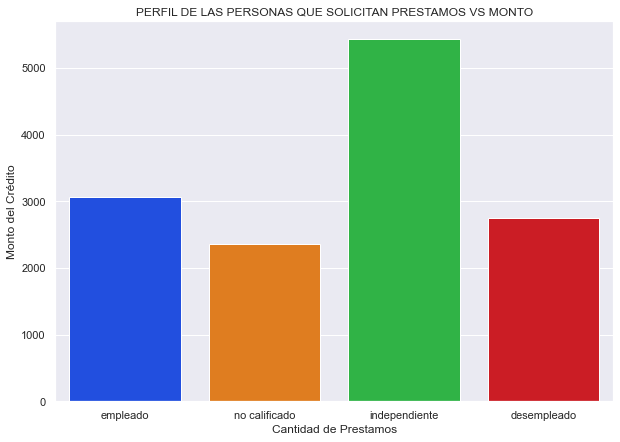

             Job  Credit Amount
0    desempleado    2745.136364
1       empleado    3070.965079
2  independiente    5435.493243
3  no calificado    2358.520000


In [36]:
#Perfil de las personas que realizan prestamos mas y menos costosos
plt.figure(figsize=(10,7))
sb.barplot(x = 'Job', y = 'Credit Amount', data = data, ci = None, palette="bright")
plt.title("PERFIL DE LAS PERSONAS QUE SOLICITAN PRESTAMOS VS MONTO")
plt.ylabel("Monto del Crédito")
plt.xlabel("Cantidad de Prestamos")
plt.show()
#print(data.groupby('Job')['Credit Amount'].count())
print(data[['Job', 'Credit Amount']].groupby('Job', as_index = False).agg({'Credit Amount':'mean'}))

### *3.3 Relación entre edad, status personal y clase*

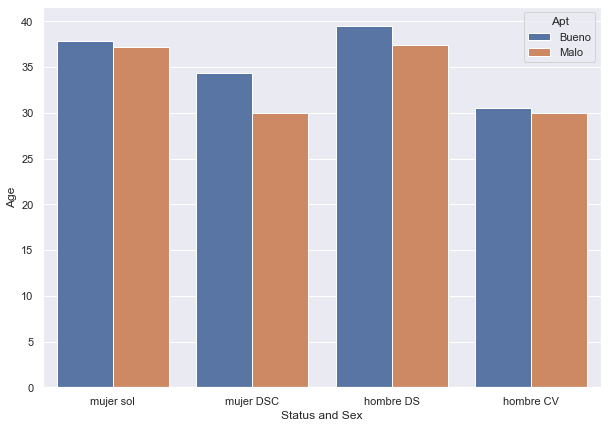

In [37]:
plt.figure(figsize=(10,7))
sb.barplot(x = 'Status and Sex', y = 'Age', hue = 'Apt', data = data, ci=False)
plt.show()

### *3.5 y 3.7 Combinaciones entre atributos y sus respectivas relaciones

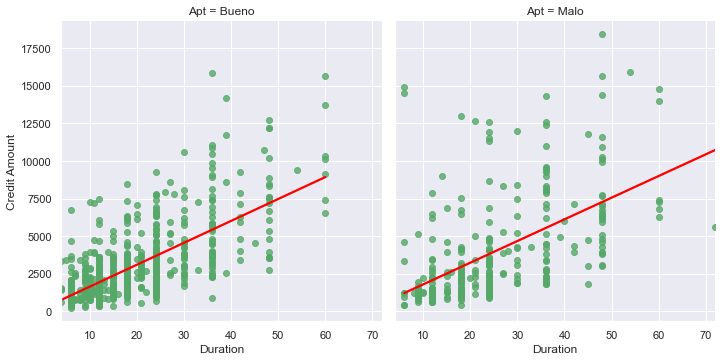

In [38]:
#ax = sb.lenplot
ax = sb.lmplot(y = 'Credit Amount', x = 'Duration', data = data, col = 'Apt', height = 5, ci = None,
line_kws= {'color':'red'}, scatter_kws={'color':'g'})

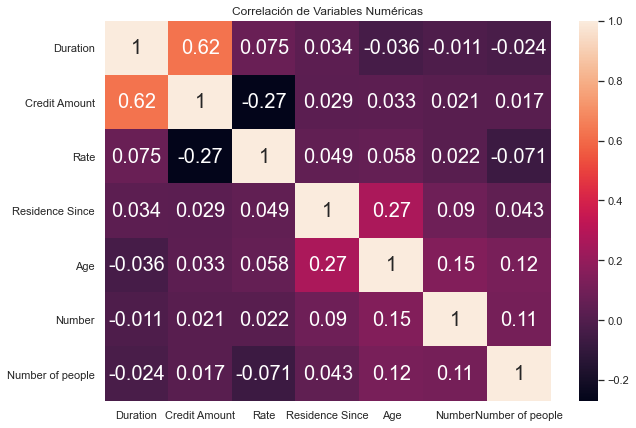

Observando la matriz de correlación, se puede observar que existe una correlación negativa
        entre el monto del crédito y el porcentaje de interés. Asimismo, existe una correlación
        positiva entre el monto del crédito con respecto a la duración del préstamo.


In [39]:
plt.figure(figsize=(10,7))
pc = data.corr(method ='pearson')
ax = sb.heatmap(pc, annot=True, annot_kws={'size': 20})
plt.title('Correlación de Variables Numéricas')
plt.show()
print("""Observando la matriz de correlación, se puede observar que existe una correlación negativa
        entre el monto del crédito y el porcentaje de interés. Asimismo, existe una correlación
        positiva entre el monto del crédito con respecto a la duración del préstamo.""")


### *3.4 y 3.6 Combinaciones entre atributos y sus respectivas relaciones

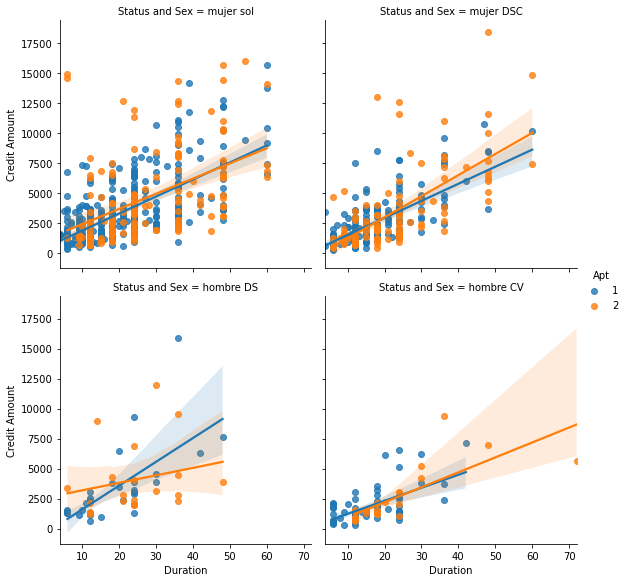

In [20]:
ax = sb.lmplot(y="Credit Amount", x="Duration", hue = 'Apt', col = 'Status and Sex', data=data, height=4, col_wrap=2)

### *Punto 4*

In [21]:
import plotly.express as px
fig = px.parallel_coordinates(data, color='Apt',
                             dimensions = ['Duration', 'Credit Amount', 'Age', 'Rate'],
                             color_continuous_scale=px.colors.diverging.Tealrose,      
                             color_continuous_midpoint=2, title='Diagrama de Coordenadas Paralelas', width=900 )            
fig.show()

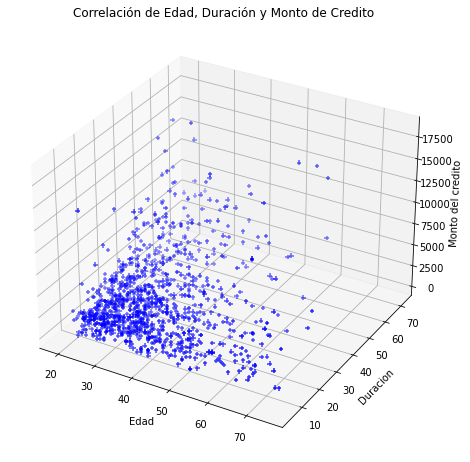

In [15]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(12, 6))   
ax = Axes3D(fig)
ax.scatter(data["Age"],data["Duration"] ,data["Credit Amount"] , marker='+', c='b')
ax.set_xlabel('Edad')        
ax.set_ylabel('Duracion')     
ax.set_zlabel('Monto del credito')
ax.set_title('Correlación de Edad, Duración y Monto de Credito', loc='center')     
plt.show()

## 5. Hipótesis

### Hipotesis Alternativa: si existen diferencias significativas en el monto del credito de las personas que clasificarón o no a un prestamo
### Hipotesis Nula : No, son iguales

In [37]:
from scipy.stats import ttest_ind
bueno = data.loc[data['Apt'] == 1]
malo = data.loc[data['Apt'] == 2]
buenoMonto= bueno['Credit Amount']
maloMonto = malo['Credit Amount']

In [40]:
stat, p = ttest_ind(maloMonto, buenoMonto)
print('t=%.3f, p=%.6f' % (stat, p))

t=4.948, p=0.000001


### Dado el resultado podemos decir que la hipótesis alternativa es aceptada por lo tanto si existen diferencias significativas